### Digital Subscriber Line (DSL) TX/RX

We fight against:
- channel
- interfering signals
- hardware imperfections

In [1]:
import numpy as np
import matplotlib.pyplot as plt

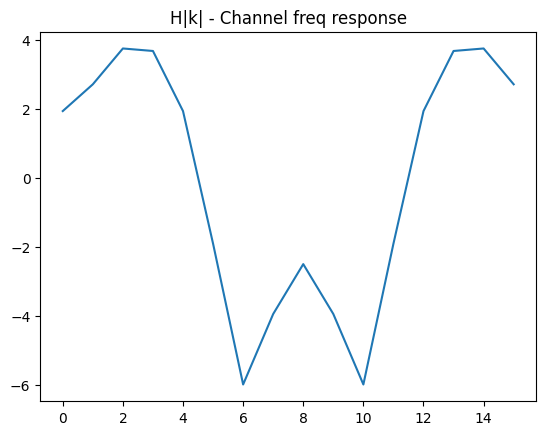

In [125]:
Kiter=10 # Number of DMT symbols
N = 16 # symbol length
P = 4 # prefix length
nstd=0 # channel noise standard deviation

# CHANNEL MODELLING
h = np.array([1, 0.5, 0, -0.25]) # channel impulse response
Nh = len(h)
H = np.fft.fft(np.concatenate((h, np.zeros(N-len(h)))))

# PLOTTING THE CHANNEL FREQUENCY RESPONSE
plt.plot(20*np.log10(abs(H)))
plt.title("H|k| - Channel freq response")
plt.show()

# TRANSMITTER
Nx=Kiter*(N+P)
x = np.array([])
x1ref = []
S1ref = []

for k in range(Kiter):
    qam4 = np.array([1+1j, 1-1j, -1+1j, -1-1j])
    S0 = np.random.choice(qam4, N//2-1)
    S1 = np.zeros(N, dtype=complex)
    S1[1:N//2] = S0
    S1[N//2+1:] = np.conj(S0[::-1])
    x1=np.fft.ifft(S1)
    S1ref.append(S1)

    x1p = np.concatenate((x1[N-P:], x1)) # one symbol plus prefix
    x = np.concatenate((x, x1p)) # chain of DMT symbols
    x1ref.append(x1) # storing transmitted signals

# CHANNEL
y = np.convolve(x,h)
y = y[:Nx]
y = y + 0.05 * np.sin(2*np.pi/N * 100.5 * np.arange(Nx)) # additional sinusoid interference
y = y + nstd*np.random.randn(Nx) # add Noise
#y = np.concatenate(([0], y[:-1])) # de-sychronize receiver by delaying it by one sample

# RECEIVER
y1p = np.reshape(y,(Kiter,N+P)) # Serial to pararell
y1=y1p[:,P:] # removing prefixes
Y1 = np.fft.fft(y1,axis=1)
H = H.reshape(1, N)

Y1e = Y1 / H # Channel equalization
y1e = np.fft.ifft(Y1e, axis=1) # back into the time domain

# ERRORS
results = np.mean(np.abs(x1ref - y1e)**2)
resultsY = np.mean(np.abs(S1ref - Y1e)**2)

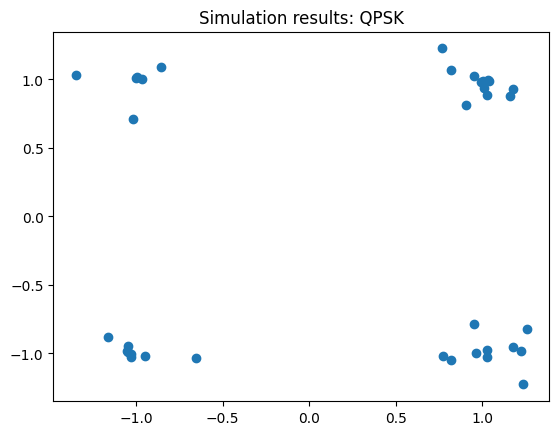

In [126]:
# plotting the results
Y1e = Y1e[2:N//2, N//2+2:N]
plt.scatter(np.real(Y1e),np.imag(Y1e))
plt.title("Simulation results: QPSK")
plt.show()